In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

from plotting import init_plot

In [2]:
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

In [3]:
# import 1st flow rate chart
data = pd.read_csv('../data/Virtaama_Alaköngäs_20230101_20231231_v2.csv', delimiter=';')

In [4]:
data

,Aika,Arvo
0,1.1.2023,64.83
1,2.1.2023,64.87
2,3.1.2023,64.13
3,4.1.2023,63.62
4,5.1.2023,63.12
...,...,...
347,27.12.2023,368.28
348,28.12.2023,365.34
349,29.12.2023,364.73
350,30.12.2023,364.66


In [5]:
data["Aika"] = pd.to_datetime(data["Aika"], format="mixed", dayfirst=True)
data = data.set_index("Aika")

In [6]:
data

,Arvo
Aika,
2023-01-01,64.83
2023-01-02,64.87
2023-01-03,64.13
2023-01-04,63.62
2023-01-05,63.12
...,...
2023-12-27,368.28
2023-12-28,365.34
2023-12-29,364.73


In [7]:
#fig, ax = init_plot()
#data.plot(color = 'black', linestyle="solid", ax=ax, legend=False)
#ax.set_xlabel("Date")
#ax.set_ylabel("Discharge $m^3$/s")

In [8]:
#fig.savefig('../plots/alakongas_discharge.png')

In [9]:
#weatherdata
wdata = pd.read_csv('../data/Sää_UtsjokiNuorgam_20230101-20231231_v2.csv', delimiter=',')

In [10]:
wdata

,Aika,Sademaara (mm),Lampotila C
0,1.1.2023,4.9,-3.4
1,2.1.2023,0.5,-2.3
2,3.1.2023,0.2,-16.7
3,4.1.2023,-1.0,-14.7
4,5.1.2023,-1.0,-12.7
...,...,...,...
360,27.12.2023,0.3,-8.3
361,28.12.2023,-1.0,-20.1
362,29.12.2023,-1.0,-12.0
363,30.12.2023,-1.0,-21.4


In [11]:
wdata["Aika"] = pd.to_datetime(wdata["Aika"], format="mixed", dayfirst=True)
wdata = wdata.set_index("Aika")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


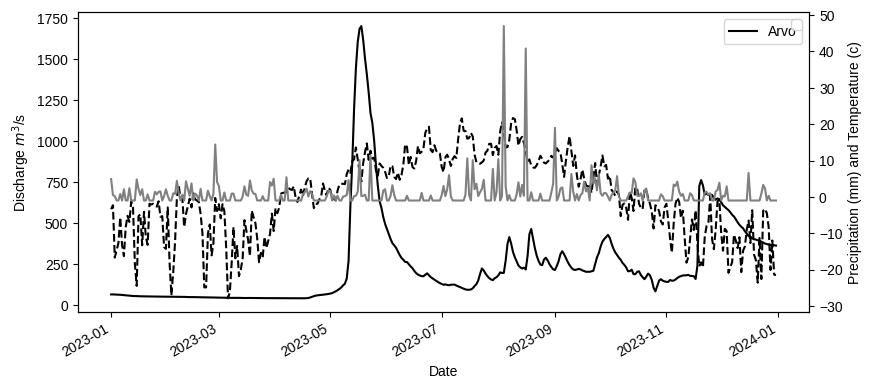

In [23]:
fig, ax = init_plot()
data.plot(color = 'black', linestyle="solid", ax=ax, legend=True)
ax.set_xlabel("Date")
ax.set_ylabel("Discharge $m^3$/s")

ax2 = ax.twinx()
ax2.set_ylabel('Precipitation (mm) and Temperature (c)')
ax2.plot(wdata['Lampotila C'], color='black', linestyle='dashed')
ax2.plot(wdata['Sademaara (mm)'], color='grey')

<Axes: xlabel='Aika'>

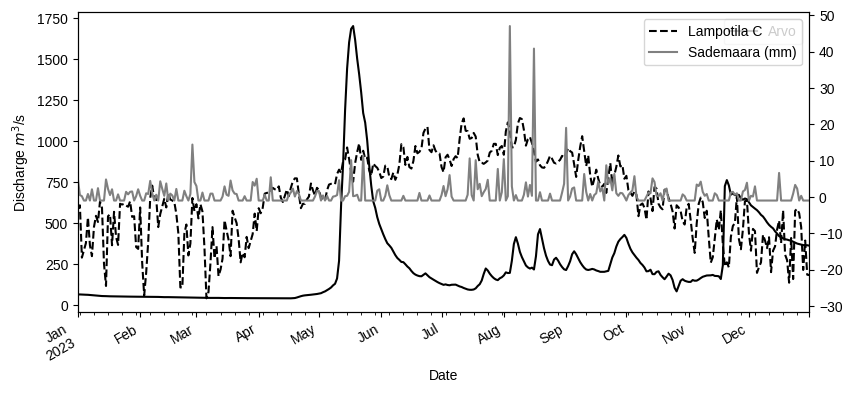

In [34]:
fig, ax = init_plot()
data.plot(color='black', linestyle="solid", ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Discharge $m^3$/s")
ax2 = ax.twinx()
wdata.plot(y='Lampotila C', color='black', linestyle='dashed', ax=ax2)
wdata.plot(y='Sademaara (mm)', color='grey', ax=ax2)